<a href="https://colab.research.google.com/github/VishnuvikasS/test-and-train/blob/main/Bigmart_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATASET DESCRIPTION

1)The project dataset have been divided into two the TRAIN and TEST datasets where the former have 8523 rows and 12 columns and the later have 5681 rows and 11 columns.

We could find that the target column in the train set is item_outlet_sales where it is the sales of the items in the particula output.

item_identifier--These are set of unique values to access the item.

4)item_Weight--Weights of the individual items.

5)item_Fat_Content--Tells about the fat content present in each items.

6)item_Visibility-The percentage of display area of the time.

7)item_Type-it is the products that are kept for sale.

8)item_MRP-The Maximum retail price for every item in a store.

9)Outlet_identifier--these are unique number to identify the outlets

10)Outlet _Establishment_Year-The year in which the outlet was established.

11)Outlet_Size--the area or the size of the outlet.

12)Outlet_Location_Type-The location type of a outlet.

13)Outlet_Type-Tells about the type whether its a super market or a grocery store.

BIGMART SALES ANALYSIS

# HYPOTHESIS GENERATION:

Sales of a particular product are influenced by its price EXPLANATION:The price of a product may influence customer purchasing decisions,with higher prices leading to lower sales,and lower price leading to higher sales.

# IMPORTING THE LIBRARIES

Here we are importing the libraries like Numpy,pandas,matplotlib,seaborn which are used in the data loading,data cleaning and data preprocessing process

In [4]:
import numpy as np
import pandas as pd
#importing the required libraries for the Analysis of the project.
#NumPy excels in creating N-dimension data objects and performing mathematical operations efficiently
#Pandas is renowned for data wrangling and its ability to handle large datasets.



# Loading of Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
train = pd.read_csv('/content/Train (2).csv')

In [8]:
test = pd.read_csv('/content/Test (6).csv')


In [10]:
train=pd.read_csv('/content/drive/MyDrive/Datasets/Train (2).csv')


In [12]:
test=pd.read_csv('/content/drive/MyDrive/Datasets/Test (6).csv')

Data structure and content

In [13]:
train.shape
# shape function Helps us identify how many rows and columns we have acoording t

(8523, 12)

In [14]:
train.columns
#it is an attribute that provides access to the column labels of data frame

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
train.isnull().sum()
#it is an attribute to identify null sets in dataframe


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
train.dtypes
#it is an attribute to ind out the data type of each column in the given dataframe

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [17]:
train.duplicated()
#it returns a series with true and false values that describes which rows in dataframe are duplicated and not

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [18]:
train.info()
#print a concise summary of the DataFrame which includes index dtypes and columns,non-null values,memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [19]:
train.describe()
#it returns description of the data


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
train.head()
#returns a specialised number of rows,strings from the top

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
train.tail()
#returns specified number of the last rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [22]:
train['Item_Type'].value_counts()
#Value_counts() categorizes the types of categories in that columns and tells the count for each and every category.


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [23]:
test['Item_Fat_Content'].value_counts()
#returns a series that contains the number of unique values.


Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [24]:
test.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.

(5681, 11)

In [25]:
test.columns
#it is an attribute that provides access to the column labels of data frame


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [26]:

test.isnull().sum()
#it is an attribute to identify null sets in dataframe

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [27]:

test.dtypes
#it is an attribute to ind out the data type of each column in the given dataframe

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [28]:
test.duplicated()
#it returns a series with true and false values that describes which rows in dataframe are duplicated and not


0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Length: 5681, dtype: bool

In [29]:
test.info()
#print a concise summary of the DataFrame which includes index dtypes and columns,non-null values,memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [30]:
test.describe()
#it returns description of the data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [31]:
train.head()
#returns a specialised number of rows,strings from the top


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
train['Item_Type'].value_counts()
#Value_counts() categorizes the types of categories in that columns and tells the count for each and every category.


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [33]:
train['Item_Fat_Content'].value_counts()
#returns a series that contains the number of unique values.


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

# DATA PREPROCESSING

In [34]:
train['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content'


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [35]:
train['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
#replace inconsistent values in 'Item_Fat_Content'


In [36]:
train['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content'


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [37]:
test['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content'

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [38]:
test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
#replace inconsistent values in 'Item_Fat_Content'


In [39]:
test['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content'


Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

# Explaratory data Analysis

uni variate analysis

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
# import Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.


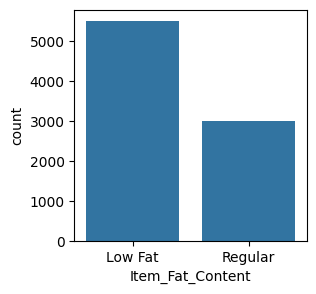

In [41]:
plt.figure(figsize=(3,3))
sns.countplot(x='Item_Fat_Content',data=train)
plt.xlabel('Item_Fat_Content')
plt.show()
# A countplot is a type of data visualization used in python.
# It is particularly useful for visualising the count occurences of each unique value.
# The sns.countplot function is used to create the count plot.
# The items have more low fat content and moderate regular fat content.

In this we have plotted the graph using train datas. so here the low fat content quantity is higher compared to regular.



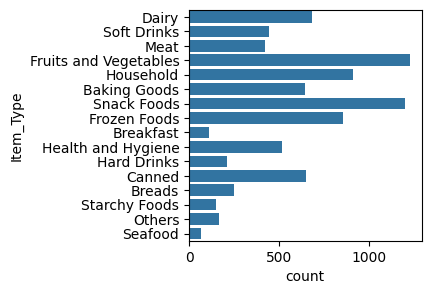

In [42]:
plt.figure(figsize=(3,3))
sns.countplot(y='Item_Type',data=train)
plt.ylabel('Item_Type')
plt.show()

In this we have plotted the graph using train datas. Here the snacksfoods,fruits and vegtable count is higher and sea food count is lower

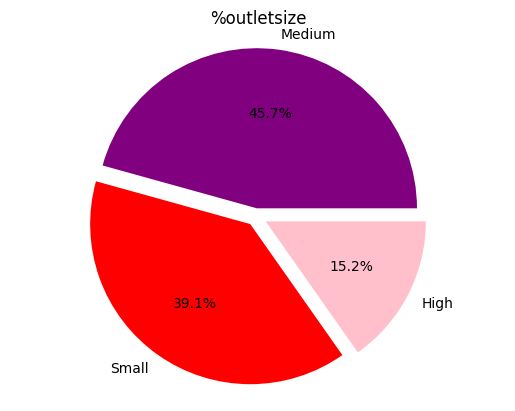

In [43]:
outletsize=train['Outlet_Size'].value_counts(normalize=True)*100
explode=(0.05,0.06,0.07)
colors=('purple','red','pink','black')
plt.pie(outletsize,labels=outletsize.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%outletsize')
plt.axis('equal')
plt.show()

In this pichart medium sized outletsize is higher and high sized outletsize is lower



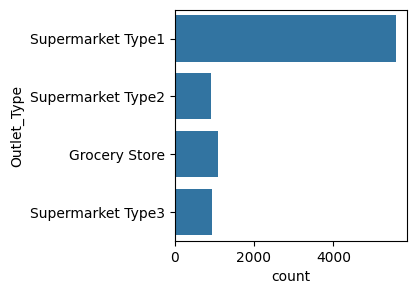

In [44]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Type',data=train)
plt.ylabel('Outlet_Type')
plt.show()


Supermarket Type 1 is high, Supermarket Type 2 is low when compared to others

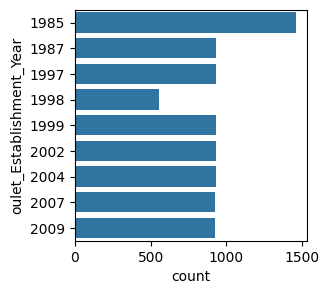

In [45]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Establishment_Year',data=train)
plt.ylabel('oulet_Establishment_Year')
plt.show()

From the above graph the year (1985 to 2009) is shown,the year 1988 is higher,1998 is lower,1987,1997 and 1999 to 2009 are equivalent

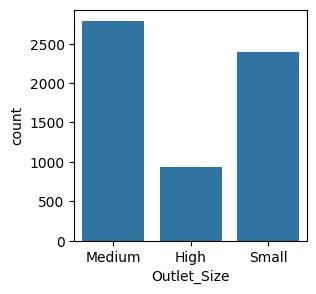

In [46]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Size',data=train)
plt.xlabel('Outlet_Size')
plt.show()

In this we have plotted the graph using train data and the medium sized outlet is higher and small high outlet is lower

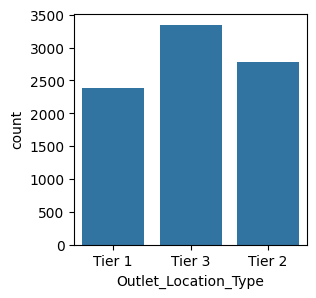

In [47]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Location_Type',data=train)
plt.xlabel('Outlet_Location_Type')
plt.show()

From the graph Tier2 Outlet location type is high,Tier1 Outlet location type is low and Tier0 Outlet location type is low

# To handle the missing null values

In [48]:
# To handle the Missing and null values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [49]:
# Coverting the labels into a numeric form using Label Encoder for the TRAIN SET.
le=LabelEncoder()
for col in train.columns:
  if train[col].dtype==object:
    train[col]=le.fit_transform(train[col])

Purpose: Encodes categorical columns in the DataFrame train as numeric values. How It Works: Initialization: Creates a LabelEncoder object. Loop: Iterates over each column in train. Check: If the column's data type is object (categorical), it transforms the values to numeric labels using LabelEncoder.

In [50]:
train['Outlet_Size'].dtypes
#display the data type of'Outlet_Size' column


dtype('int64')

In [51]:
train.head()
#display updated few rows of the datasets


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [52]:
imputer=SimpleImputer(strategy='mean')
missing_coloumns=['Item_Weight','Outlet_Size']
train[missing_coloumns]=imputer.fit_transform(train[missing_coloumns])
# Fill missing values in 'Item_Weight'and 'Outlet_Size' columns with their respective column means.



In [53]:
train.isnull().sum()
#display number of missing values of each column

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [54]:
le=LabelEncoder()
for col in test.columns:
  if test[col].dtype==object:
    test[col]=le.fit_transform(test[col])
    # Coverting the labels into a numeric form using Label Encoder for the TEST SET.



In [55]:
test['Outlet_Size'].dtypes
#display the data type of 'Outlet_Size' column


dtype('int64')

In [56]:
test.head()
#display updated few rows of the datasets


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,NaN,1,0.118599,4,234.2300,5,1985,1,2,3


In [57]:
imputer=SimpleImputer(strategy='mean')
missing_columns=['Item_Weight','Outlet_Size']
test[missing_columns]=imputer.fit_transform(test[missing_columns])
 # Fill missing values in 'Item_Weight'and 'Outlet_Size' columns with their respective column means.

In [58]:
test.isnull().sum()
#display number of missing values of each column

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#Handling the Outliers

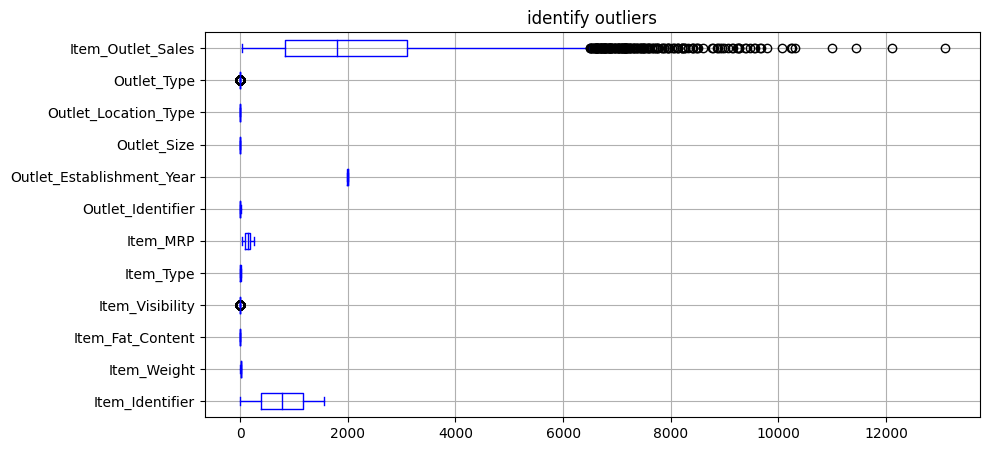

In [59]:
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()
#When exploring data, the outliers are the extreme values within the dataset. That means the outlier data points vary greatly from the expected values—either being much larger or significantly smaller.here we use train dataset here.

Box plots are useful because they show minimum and maximum values, the median, and the interquartile range of the data. In the chart, the outliers are shown as points which makes them easy to see.

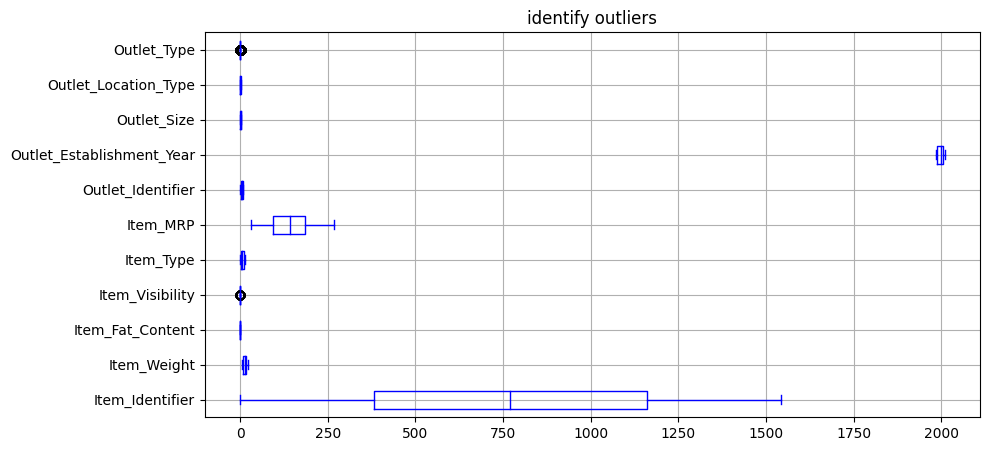

In [60]:
number_columns=test.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()
#indentifying outliers by creating boxplots from test data.


Box plots are useful because they show minimum and maximum values, the median, and the interquartile range of the data. In the chart, the outliers are shown as points which makes them easy to see.

In [61]:
# Assuming 'train' is a DataFrame and 'Item_Outlet_Sales' is a column in it
q1=np.percentile(train['Item_Outlet_Sales'],25)
q3=np.percentile(train['Item_Outlet_Sales'],75)
iqr=q3-q1
print('q1',q1)
print('q3',q3)
print('IQR',iqr)

q1 834.2474
q3 3101.2964
IQR 2267.049


In [62]:
# Calculate the upper and lower bounds for outlier detection
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)


upperlimit 6501.8699
lowerlimit -2566.3261


Cube Transformation

In [63]:
# Computes the cube root of the sales data.
train['Outlet_Sales_Square']=np.cbrt(train['Item_Outlet_Sales'])

In [64]:
# Computes the cube root of the sales data.
train['Outlet_Sales_Cube']=np.cbrt(train['Item_Outlet_Sales'])


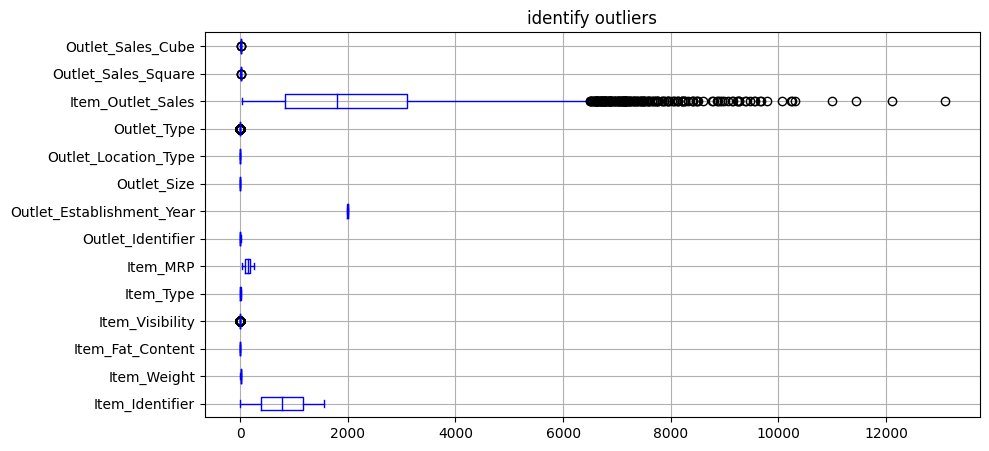

In [65]:
# Select numeric columns
number_columns=train.select_dtypes(include=['int64','float64'])
# Create boxplot
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()


The above graph of the column1,2,3,10 that are outlet_sales_cube,Item_Outlet_sales,Outlet_Type and item_visibility are having the Outliers , when comparing to others the Item_Outlet_Sales having more outliers

Bi variate analysis

<ipython-input-66-c6802087f965>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

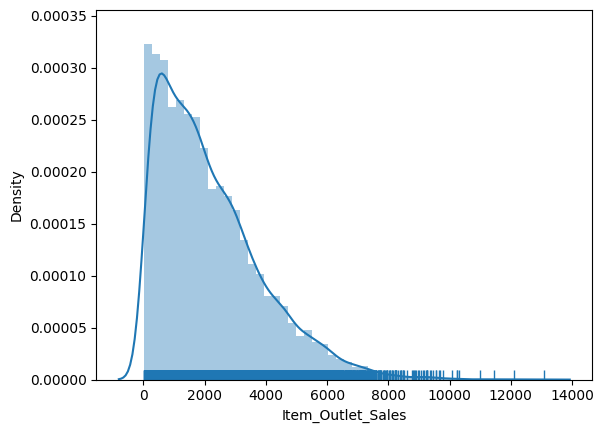

In [66]:
# Plot distribution with KDE and rug plot
sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)


The graph plot shows that "Item_Outlet_Sales" is right-skewed, with a majority of sales concentrated at lower values and a long tail extending toward higher sales. The graph indicates that very high Density of Item_Outlet_Sales

<ipython-input-67-cd80ee82ca8b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Outlet_Sales_Cube'],kde=True ,rug=True)


<Axes: xlabel='Outlet_Sales_Cube', ylabel='Density'>

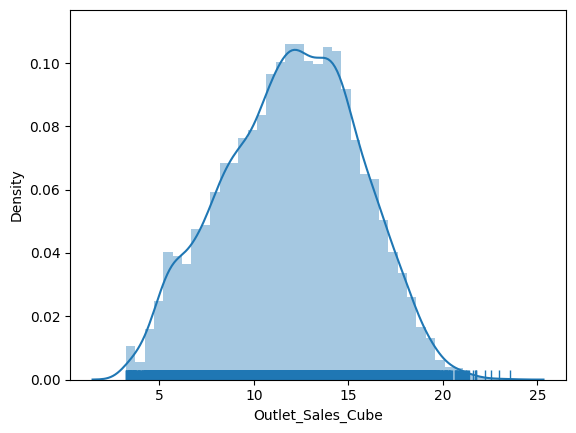

In [67]:
# Plot distribution with KDE and rug plot for Outlet_Sales_Cube
sns.distplot(a=train['Outlet_Sales_Cube'],kde=True ,rug=True)


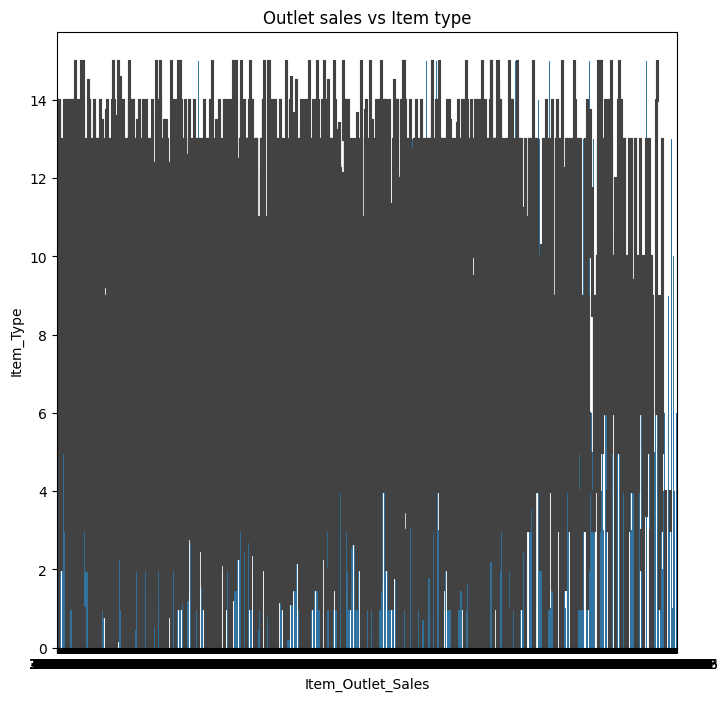

In [68]:
# Set the size of the figure
plt.figure(figsize=(8,8))
# Create a bar plot with 'Item_Outlet_Sales' on the x-axis and 'Item_Type' on the y-axis
sns.barplot(x='Item_Outlet_Sales',y='Item_Type',data=train).set(title='Outlet sales vs Item type')
# Set the labels for the x and y axes
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Type')
# Display the plot
plt.show()

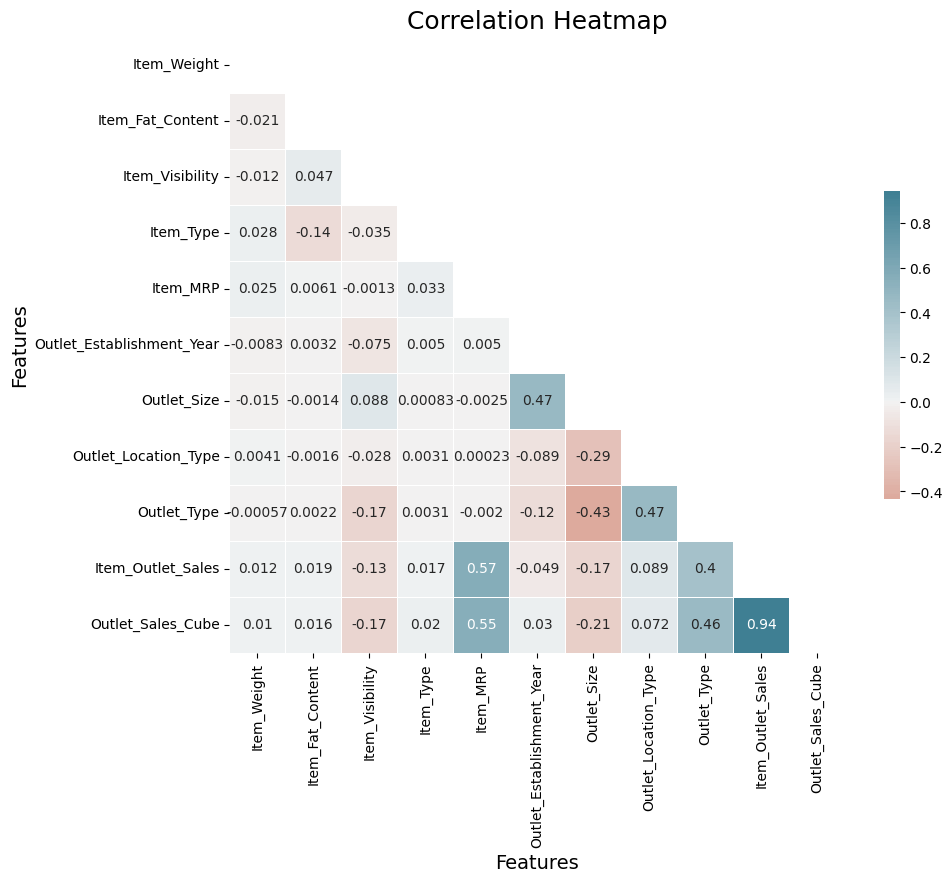

In [69]:
# Subset the dataset to include only the relevant columns
subset = train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
             'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
             'Item_Outlet_Sales','Outlet_Sales_Cube']]

# Calculate the correlation matrix
corr = subset.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap with green and white colors
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=200),
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and labels for the plot
ax.set_title("Correlation Heatmap", fontsize=18)
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Show the plot
plt.show()


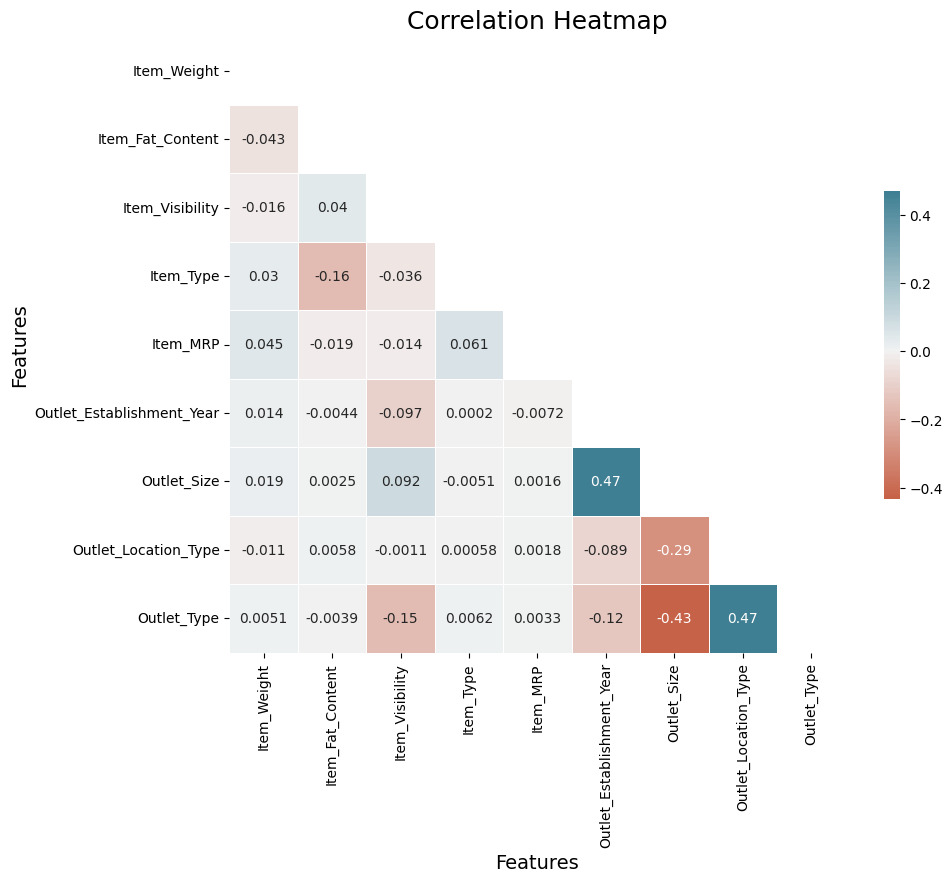

In [70]:
# Subset the dataset to include only the relevant columns
subset = test[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
             'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

# Calculate the correlation matrix
corr = subset.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap with green and white colors
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=200),
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and labels for the plot
ax.set_title("Correlation Heatmap", fontsize=18)
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Show the plot
plt.show()

The above graph shows the "Outlet_sales_cube" is approximately normal, with a symmetric bell-shaped curve centered around the density.This suggests that the data is well-distributed without significant.

In [71]:
train.head()
# Display the first 5 rows of the DataFrame

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,15.515611
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,7.625576
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,12.800240
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,9.013888
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,9.982319


# Feature Engineering


In [72]:
train.head()
# Display the first 5 rows of the DataFrame


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,15.515611
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,7.625576
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,12.800240
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,9.013888
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,9.982319


In [73]:
#adding a new column to train data called Outlet_Age, which calculates the age of each outlet based on the establishment year
train['Outlet_Age']=train['Outlet_Establishment_Year'].apply(lambda year: 2024-year)


In [74]:
train.head()
# Display the first 5 rows of the DataFrame

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube,Outlet_Age
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,15.515611,25
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,7.625576,15
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,12.800240,25
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,9.013888,26
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,9.982319,37


In [75]:
#Removing unnecessary columns from train that are not needed for your analysis or modeling.
train=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales','Outlet_Size','Item_Weight'],axis=1)


In [76]:
train=train.drop(['Item_Visibility'],axis=1)


In [77]:
train.head()
# Display the first 5 rows of the DataFrame

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Sales_Square,Outlet_Sales_Cube,Outlet_Age
0,0,4,249.8092,0,1,15.515611,15.515611,25
1,1,14,48.2692,2,2,7.625576,7.625576,15
2,0,10,141.6180,0,1,12.800240,12.800240,25
3,1,6,182.0950,2,0,9.013888,9.013888,26
4,0,9,53.8614,2,1,9.982319,9.982319,37


In [78]:
#Initialize the scaler
from sklearn.preprocessing import StandardScaler

In [79]:
# set feature matrix X and target vector y for a machine learning model.
x=train[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]
y=train['Outlet_Sales_Cube']

In [80]:
scaler=StandardScaler()
#Initialize the scaler

In [81]:
x=scaler.fit_transform(x)
# Fit and transform the training data


In [82]:
x=pd.DataFrame(x)
# Convert x to DataFrame if it is not already one


In [83]:
x.head()
# Check the DataFrame


,0,1,2,3,4,5
0,-0.738147,-0.766479,1.747454,-1.369334,-0.252658,-0.139541
1,1.354743,1.608963,-1.489023,1.091569,1.002972,-1.334103
2,-0.738147,0.658786,0.010040,-1.369334,-0.252658,-0.139541
3,1.354743,-0.291391,0.660050,1.091569,-1.508289,-0.020085
4,-0.738147,0.421242,-1.399220,1.091569,-0.252658,1.293934


Model Building

In [84]:
from sklearn.linear_model import LinearRegression
# For evaluating the models using the metrics
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection  import cross_val_score as CVS


In [85]:
# Define the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(x, y)

# Precting the model using the test set
y_predict = lr.predict(x)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", lr.score(x,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(lr, x, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")

R-Square value on the training set: =  0.5479170954222314
----------------------------------------------------------------------------------------------
CV R-squared scores: [0.55720549 0.56274019 0.52765011 0.53782978 0.54762596] 

Average CV R-squared score: 0.5466103056990158 



In [86]:
import pickle
#serialize and deserialize data types


In [87]:
Bigmart= "BigMart_Analysis.sav"
pickle.dump(lr,open(Bigmart,'wb'))
#serialize and deserialize data types

SUMMARY:

Loading of Data: This step involves bringing the data into a system where it can be analyzed. Think of it as moving the data from spreadsheets into a software tool for analysis.

Data Preprocessing: This is where you clean and prepare the data. It involves fixing any issues with the data to make sure it's ready for analysis.

Exploratory Data Analysis EDA: In this step, you explore the data to find patterns and trends. This helps you understand the data better and spot any interesting insights.

Handling Missing and Categorical Values: Sometimes, data might be missing or in a format that needs special treatment like categories. This step involves filling in missing information and converting categories into a usable format.

Handling Outliers: Outliers are unusual values that can skew results. This step involves identifying and managing these outliers to ensure they dont affect the analysis too much.

Feature Engineering: This is about creating new features or variables from the existing data to improve the analysis. Its like turning raw data into useful information that can help with predictions and decision-making.

In summary, the project involves understanding, cleaning, and preparing the data, exploring it for patterns, handling any issues with missing or unusual values, and creating useful features to make better predictions and decisions.